<a href="https://colab.research.google.com/github/nahumsa/DM-Reconstruction/blob/master/Autoencoder%20Benchmark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Autoencoder Benchmark

## Import dependencies for Google Colab

In [11]:
! git clone https://github.com/nahumsa/DM-Reconstruction

Cloning into 'DM-Reconstruction'...
remote: Enumerating objects: 91, done.
remote: Counting objects: 100% (91/91), done.
remote: Compressing objects: 100% (88/88), done.
remote: Total 247 (delta 44), reused 10 (delta 2), pack-reused 156
Receiving objects: 100% (247/247), 2.79 MiB | 2.43 MiB/s, done.
Resolving deltas: 100% (119/119), done.


In [12]:
!pip install qutip

In [13]:
% cd DM-Reconstruction/

/content/DM-Reconstruction/DM-Reconstruction


## Import Dependencies

In [14]:
try:
  %tensorflow_version 2.x

except Exception:
  pass
  
import tensorflow as tf

#Set Random Seed for reproduction
tf.random.set_seed(1234)

import numpy as np
from tensorflow.keras import layers
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

# Remove warnings
import logging
logging.getLogger('tensorflow').disabled = True

#Use this to not need to initialize tensors outside session
tf.config.experimental_run_functions_eagerly(True)

In [ ]:
%load_ext autoreload
%autoreload 2

## Loading Dataset

In [33]:
X_train = np.loadtxt('Data/Measurements/X_train.txt')
X_test = np.loadtxt('Data/Measurements/X_test.txt')

## Model

## Using a simple AutoEncoder with a Mean Squared Error

In [34]:
from Models.AE import AutoEncoder
latent_dim = 20
input_dim = X_train.shape[1]
hidden_dims = [64,128,256]
batchsize = 32
dropout_rate=0.3

AE = AutoEncoder(original_dim=input_dim, 
            intermediate_dim= hidden_dims,
            latent_dim=latent_dim,
            dropout_rate=dropout_rate)

AE.compile(optimizer="adam", loss="mse", metrics=["mae"])

In [ ]:
epochs = 10
history = AE.fit(x=X_train,
                 y=X_train, 
                 epochs=epochs,                                                                                   
                 validation_data=(X_test,X_test)
                )

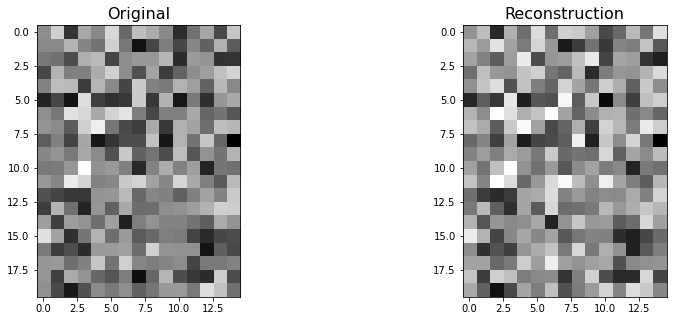

In [36]:
fig = plt.figure(figsize=(14,5))
gs = fig.add_gridspec(1, 2)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])


ax1.imshow((X_test[0:20]), cmap="gray")
ax1.set_title('Original', size=16)

ax2.imshow(AE.predict(X_test[0:20]), cmap="gray")
ax2.set_title('Reconstruction', size=16)

plt.show()

In [43]:
from Utils.QMetrics import fidelity_rho

fid = []

with tqdm(total=len(X_test)) as pbar:
  for val_1, val_2 in zip(X_test, AE.predict(X_test)):
    fid.append(fidelity_rho(val_1,val_2))
    pbar.update(1)

print(f'Fidelity: {np.mean(fid)}')


Fidelity: 0.9581514696372839
